<h1 style="color: #FF8C00; font-weight: 900; text-align: center;">GLOBAL BEVERAGE CONSUMPTION: COFFEE VS. TEA ANALYSIS</h1>

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import seaborn as sns


-- 1. Reading the .csv dataset --

In [187]:
df = pd.read_csv('global_beverage_survey.csv')
print(df.to_string(index=False, line_width=100000))

 Country        Region Preferred Beverage  Consumption Rate  Primary Type
      UK        Europe                Tea               3.5     Black Tea
     USA North America             Coffee               2.8 Filter Coffee
  Brazil South America             Coffee               4.2 Filter Coffee
   Japan          Asia                Tea               3.1     Green Tea
 Germany        Europe             Coffee               3.8 Filter Coffee
   China          Asia                Tea               4.0     Green Tea
   Kenya        Africa                Tea               2.5     Black Tea
  Mexico North America             Coffee               2.1 Filter Coffee
   India          Asia                Tea               3.3     Black Tea
Colombia South America             Coffee               4.5      Espresso
   Italy        Europe             Coffee               3.0      Espresso
Ethiopia        Africa             Coffee               3.2 Filter Coffee
  Canada North America             Cof

--- 2. DESCRIPTIVE ANALYSIS ---


In [188]:
print("--- Descriptive Statistics of the Dataset ---")
print(df.describe(include='all'))

--- Descriptive Statistics of the Dataset ---
       Country  Region Preferred Beverage  Consumption Rate   Primary Type
count       15      15                 15         15.000000             15
unique      15       5                  2               NaN              4
top         UK  Europe             Coffee               NaN  Filter Coffee
freq         1       4                  9               NaN              7
mean       NaN     NaN                NaN          3.146667            NaN
std        NaN     NaN                NaN          0.748204            NaN
min        NaN     NaN                NaN          2.000000            NaN
25%        NaN     NaN                NaN          2.600000            NaN
50%        NaN     NaN                NaN          3.100000            NaN
75%        NaN     NaN                NaN          3.650000            NaN
max        NaN     NaN                NaN          4.500000            NaN


-- 1. BOX PLOT  ANALYSIS (Consumption Rate by Region) ---


<Axes: xlabel='Region', ylabel='Consumption Rate'>

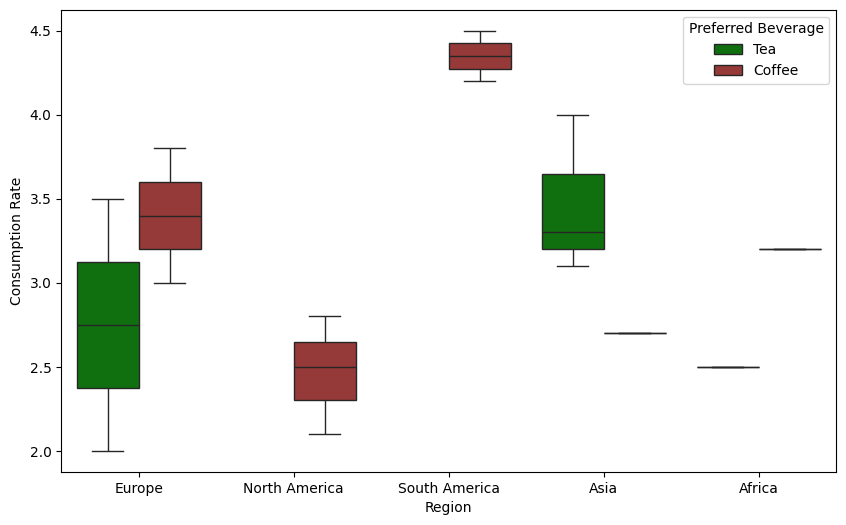

In [189]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Region', y='Consumption Rate', data=df,
hue='Preferred Beverage',  
palette={'Coffee': 'brown', 'Tea': 'green'})





-- Analysis on the Regional Consumption Box Plot
1. The box plot  shows the distribution of the average daily consumption rate (Consumption Rate) across the five global regions.
2. Africa and North America show the lowest median consumption rates.
3. South America shows the highest median consumption rate and the widest spread  indicating high-volume coffee drinking.
4. Asia and Europe have similar median consumption rates, though Asia's range is slightly wider.



---2. Grouped Bar Chart (Preferred Beverage Count by Region ) ---

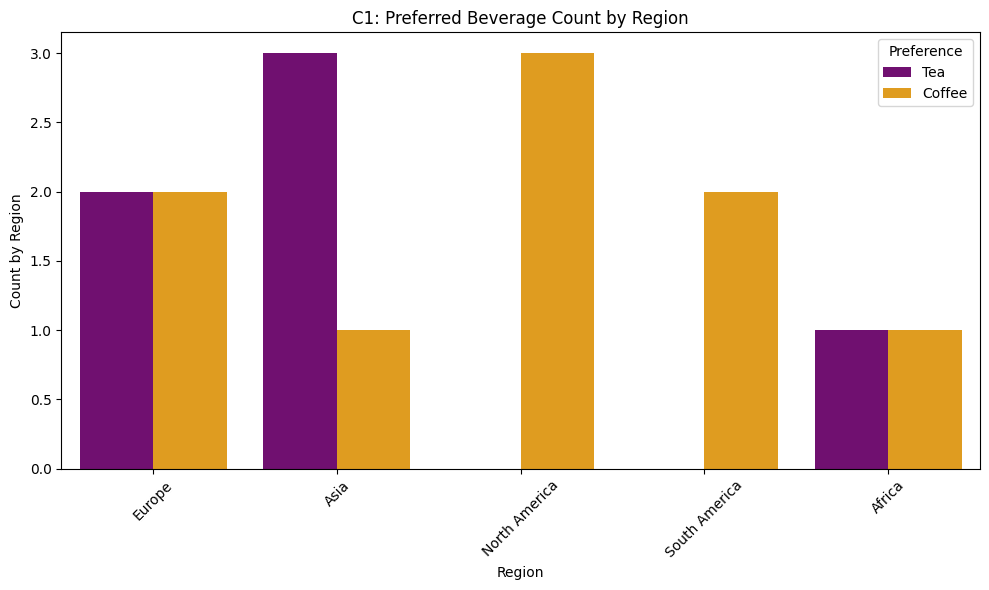

In [190]:
custom_colors = ['orange','purple']
plt.figure(figsize=(10,6))
sns.countplot(x='Region', hue='Preferred Beverage', data=df,
order=df['Region'].value_counts().index,
palette={'Coffee': 'orange', 'Tea': 'purple'})
plt.title('C1: Preferred Beverage Count by Region')
plt.xlabel('Region')
plt.ylabel('Count by Region')
plt.legend(title='Preference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




* **Insight:** South America and North America is exclusively Coffee-preferring in this sample, while Asia shows a strong preference for Tea. Europe and Africa show a slightly mixed but generally Coffee-dominant preference.


3. --- KDE Plot (Consumption Rate Distribution by Preferred Beverage)---


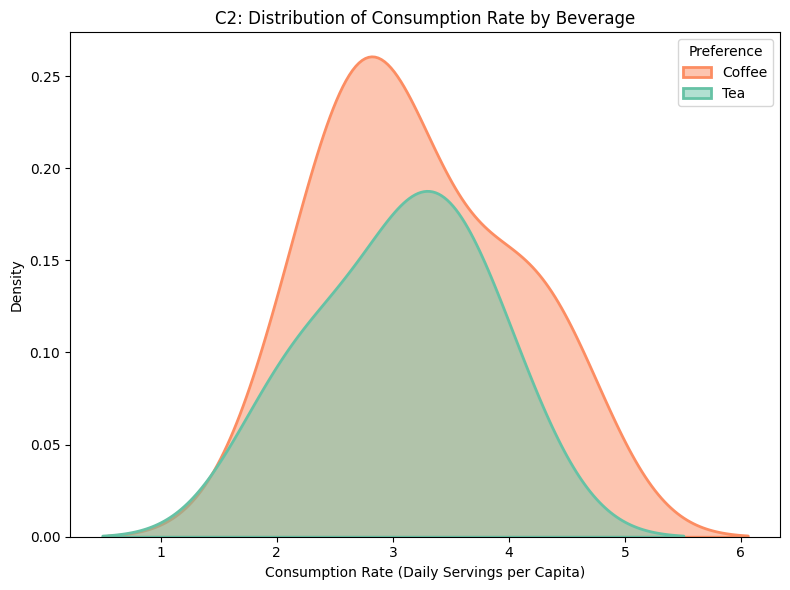

In [191]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Consumption Rate', hue='Preferred Beverage', fill=True, alpha=.5, linewidth=2,
            palette='Set2')
plt.title('C2: Distribution of Consumption Rate by Beverage')
plt.xlabel('Consumption Rate (Daily Servings per Capita)')
plt.ylabel('Density')
plt.legend(title='Preference', labels=['Coffee', 'Tea'])
plt.tight_layout()
plt.show()


* **Insight:**
  1. The highest point on the Tea curve is higher, around 3.4 servings/day when compared to coffee which is around 2.8 servings per day.
  2. However, the absolute maximum average daily consumption rate for coffee is (4.5 servings per day) and is higher than the maximum average daily consumption rate for Tea.

4-- Bar Chart (Primary Type Distribution )--

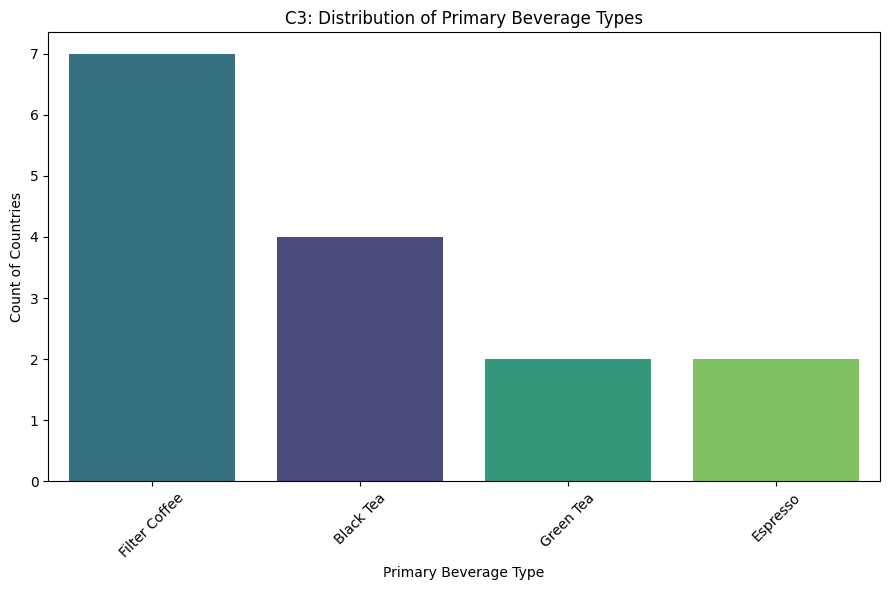

In [192]:
# --- CELL 3: Primary Type Distribution (Bar Chart) ---
plt.figure(figsize=(9, 6))
sns.countplot(x='Primary Type', hue= 'Primary Type',data=df,
              order=df['Primary Type'].value_counts().index,
              palette='viridis')
plt.title('C3: Distribution of Primary Beverage Types')
plt.xlabel('Primary Beverage Type')
plt.ylabel('Count of Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



* **Insight:** **Filter Coffee** is the most common primary beverage type in this global sample (7 countries), followed by **Black Tea** (4 countries). **Green Tea** and **Espresso** are the least common primary types (2 countries each).

5-- **Horizontal Bar Plot** --

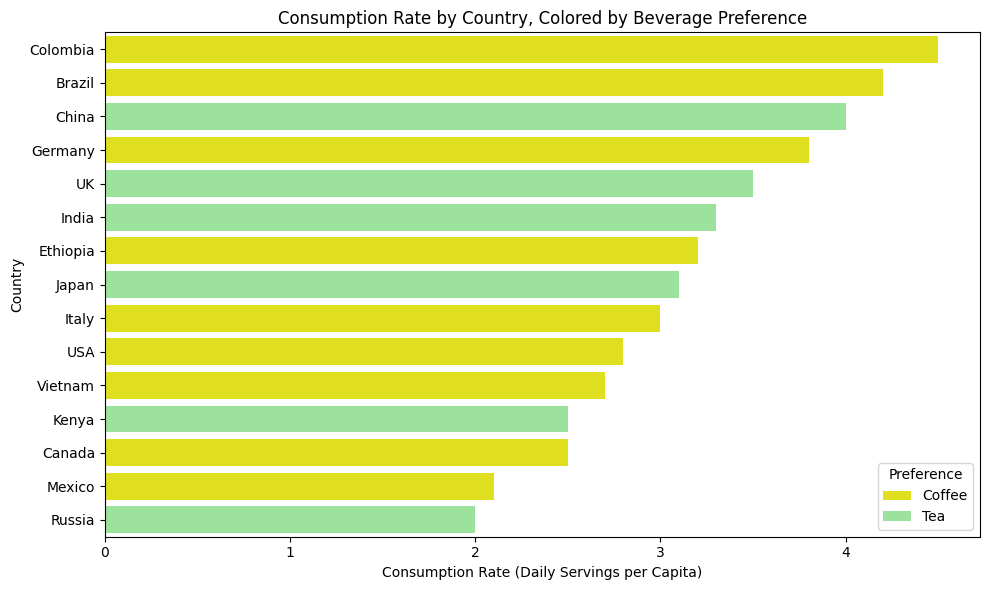

In [193]:
df_sorted = df.sort_values(by='Consumption Rate', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Consumption Rate',
    y='Country',
    hue='Preferred Beverage',
    data=df_sorted,
    palette={'Coffee': 'yellow', 'Tea': 'lightgreen'},
    dodge=False
)
plt.title('Consumption Rate by Country, Colored by Beverage Preference')
plt.xlabel('Consumption Rate (Daily Servings per Capita)')
plt.ylabel('Country')
plt.legend(title='Preference', loc='lower right')
plt.tight_layout()
plt.show()


* **Insight:**  This Horizontal Bar Chart clearly specifies each country's Beverage preference.
  1. The graph highlights that **Colombia** and **Brazil** are the highest-consumers of Coffee.
  2. **China** is a Tea preferring country and **Germany** a Coffee-preferring country. 